In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,geometry,fips,unemp_rate_year_2013,unemp_rate_year_2014,unemp_rate_year_2015,unemp_rate_year_2016,unemp_rate_year_2017,unemp_rate_year_2018,med_h_income_year_2013,med_h_income_year_2014,med_h_income_year_2015,med_h_income_year_2016,med_h_income_year_2017,med_h_income_year_2018,resident_pop_year_2013,resident_pop_year_2014,resident_pop_year_2015,resident_pop_year_2016,resident_pop_year_2017,resident_pop_year_2018,snap_beneficiaries_year_2013,snap_beneficiaries_year_2014,snap_beneficiaries_year_2015,snap_beneficiaries_year_2016,snap_beneficiaries_year_2017,snap_beneficiaries_year_2018,bachelors_deg_year_2013,bachelors_deg_year_2014,bachelors_deg_year_2015,bachelors_deg_year_2016,bachelors_deg_year_2017,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop
2279,2279,Delaware,Pennsylvania,PA,27320,29636,Delaware,POLYGON ((-75.60153199999999 39.85643299999999...,42045.0,5.6,4.7,4.2,4.1,4.0,4.6,64186.0,62867.0,67184.0,67773.0,73637.0,71961.0,561.635,562.868,563.434,563.860,564.015,565.506,65311.0,66163.0,70290.0,71280.0,70875.0,69684.0,35.0,35.5,36.0,36.8,37.7,38.3,4.00,1044731,899241,993429,1143220,1062651,1021943,0.593926,0.374112
1125,1125,Assumption,Louisiana,LA,27300,28465,Assumption,"POLYGON ((-91.259878 29.987980999999998, -91.2...",22007.0,6.4,7.8,7.0,7.7,6.2,7.1,44749.0,46317.0,48516.0,45847.0,45774.0,48120.0,23.201,23.052,22.902,22.773,22.586,22.280,4041.0,3932.0,4110.0,4579.0,4477.0,4062.0,9.7,10.7,10.7,11.4,10.3,10.2,2.20,353025,315357,372613,391869,329201,307192,0.360510,0.615737
2788,2788,Young,Texas,TX,27326,30150,Young,"POLYGON ((-98.953938 33.397534, -98.8061209999...",48503.0,4.6,3.4,4.0,4.4,3.2,3.7,44372.0,41872.0,49079.0,52133.0,44909.0,49301.0,18.353,18.267,18.154,18.095,17.916,17.953,2422.0,2210.0,2442.0,2487.0,2338.0,2088.0,16.7,17.6,17.6,18.6,19.6,19.6,2.45,1633278,1465992,1574266,1721726,1549434,1571632,0.113998,0.860146
278,278,Jackson,Colorado,CO,27287,27609,Jackson,"POLYGON ((-106.872822 40.975877, -106.871374 4...",8057.0,4.3,2.8,2.9,1.7,1.7,2.1,43549.0,45073.0,46905.0,46671.0,48785.0,51457.0,1.338,1.385,1.352,1.356,1.376,1.403,140.0,114.0,119.0,106.0,82.0,90.0,22.2,17.5,18.1,19.1,16.5,16.8,3.50,514658,413284,454062,540514,496995,524770,0.198376,0.728538
237,237,Siskiyou,California,CA,27286,27568,Siskiyou,"POLYGON ((-123.718448 41.597964999999995, -123...",6093.0,13.0,11.4,10.4,9.4,7.6,8.9,37108.0,38641.0,37447.0,40875.0,44013.0,47560.0,43.550,43.357,43.275,43.402,43.647,43.624,6646.0,6873.0,6906.0,6550.0,6267.0,6042.0,23.9,24.0,22.7,22.2,22.7,22.5,5.10,1368295,1474616,1761079,2377167,1570110,1297132,0.358238,0.565235


In [4]:
gun_violence_db = pd.read_csv('df_gun_violence.csv')
gun_violence_db.sample(5)

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,indic_suicide,indic_defens,indic_school,indic_home_inv,indic_accident,sus_adulte,vict_adulte,sus_male,vict_male,sus_injured,sus_arrested,sus_unharmed,sus_killed,vict_injured,vict_arrested,vict_unharmed,vict_killed,handgun,rifle,Nine_mm,shotgun,young_sus,young_vict
202421,201858,910031,2017-08-07,California,Stockton,Rose St and El Dorado St,0,0,http://www.gunviolencearchive.org/incident/910031,https://www.tipsoftonline.com/Push/uploads/572...,False,9.0,{0: 'Unknown'},{0: 'Handgun'},"['Non-Shooting Incident', 'Possession (gun(s) ...",37.9646,NaN,-121.2930,1.0,loaded handgun discovered during traffic stop,{0: '37'},{0: 'Adult 18+'},NaN,0::Antwone Moore,NaN,"{0: 'Unharmed, Arrested'}",{0: 'Subject-Suspect'},NaN,13.0,5.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
79877,77675,374583,2015-07-15,Kentucky,Lexington,401 S Broadway,1,0,http://www.gunviolencearchive.org/incident/374583,http://www.lex18.com/story/29554384/coroner-po...,False,6.0,{0: 'Unknown'},{0: 'Unknown'},"['Shot - Dead (murder, accidental, suicide)', ...",38.0461,Wildcat Liquor,-84.5046,1.0,NaN,NaN,{0: 'Adult 18+'},{0: 'Male'},NaN,NaN,{0: 'Killed'},{0: 'Victim'},NaN,NaN,NaN,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
56458,55325,289763,2015-02-05,Connecticut,Norwalk,291 East Avenue,0,0,http://www.gunviolencearchive.org/incident/289763,http://www.nbcconnecticut.com/news/local/Norwa...,False,4.0,NaN,NaN,"['Institution/Group/Business', 'Non-Shooting I...",41.0992,NaN,-73.4054,NaN,"Shorehaven Mobil, robbed at gunpoint with pell...",{0: '65'},{0: 'Adult 18+'},{0: 'Male'},0::Jose Rodriguez,NaN,"{0: 'Unharmed, Arrested'}",{0: 'Subject-Suspect'},NaN,137.0,25.0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
50890,49284,267416,2014-12-22,New Mexico,Las Cruces,Espina Street and Colorado Avenue,1,0,http://www.gunviolencearchive.org/incident/267416,http://www.lcsun-news.com/las_cruces-news/ci_2...,False,2.0,NaN,NaN,"['Shot - Dead (murder, accidental, suicide)', ...",32.3046,NaN,-106.7670,NaN,Perpetrator was fatally shot during a confront...,NaN,NaN,{0: 'Male'},NaN,NaN,{0: 'Killed'},{0: 'Subject-Suspect'},NaN,35.0,36.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
161194,159659,724946,2016-12-12,Michigan,Detroit,Tacoma Street and Anvil Avenue,0,1,http://www.gunviolencearchive.org/incident/724946,https://spotcrime.com/crime/86865177-ff1a0e21e...,False,14.0,{0: 'Unknown'},{0: 'Unknown'},NaN,42.4416,NaN,-82.9780,1.0,1 inj.,NaN,NaN,NaN,NaN,NaN,{0: 'Injured'},{0: 'Victim'},NaN,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt_loads)

In [6]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']


In [7]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [8]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

### Tentative de merge les deux GeoDataFrame

In [9]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')

In [60]:
total_db_geo['resident_pop_year_2016'].sum() #donc la population est en milliers 

325302.637

In [66]:
#changement de valeur pour Richmond, Virginia car valeur aberrante de 8.755 alors qu'il y avait 204 214	habitants en 2010
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2013'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2014'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2015'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2016'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2017'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2018'] = 204.214 

In [65]:
total_db_geo.loc[total_db_geo['id_county'] == 30306]

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,geometry,fips,unemp_rate_year_2013,unemp_rate_year_2014,unemp_rate_year_2015,unemp_rate_year_2016,unemp_rate_year_2017,unemp_rate_year_2018,med_h_income_year_2013,med_h_income_year_2014,med_h_income_year_2015,med_h_income_year_2016,med_h_income_year_2017,med_h_income_year_2018,resident_pop_year_2013,resident_pop_year_2014,resident_pop_year_2015,resident_pop_year_2016,resident_pop_year_2017,resident_pop_year_2018,snap_beneficiaries_year_2013,snap_beneficiaries_year_2014,snap_beneficiaries_year_2015,snap_beneficiaries_year_2016,snap_beneficiaries_year_2017,snap_beneficiaries_year_2018,bachelors_deg_year_2013,bachelors_deg_year_2014,bachelors_deg_year_2015,bachelors_deg_year_2016,bachelors_deg_year_2017,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop
2944,2944,Richmond,Virginia,VA,27330,30306,Richmond,"POLYGON ((-76.93803 38.08543, -76.93619 38.084...",51159.0,5.0,4.9,3.6,3.2,3.2,4.2,42738.0,42204.0,43888.0,45403.0,48355.0,49399.0,8.948,8.88,8.779,204.214,8.882,8.982,1521.0,1470.0,1452.0,1422.0,1366.0,1320.0,12.3,12.9,12.7,13.4,13.4,15.7,2.0,498426,419764,462997,528369,520827,476760,0.368940,0.606135
2945,2945,Richmond,Virginia,VA,27330,30306,Richmond,"POLYGON ((-77.60117 37.54516, -77.59584 37.545...",51760.0,5.0,4.9,3.6,3.2,3.2,4.2,42738.0,42204.0,43888.0,45403.0,48355.0,49399.0,8.948,8.88,8.779,204.214,8.882,8.982,1521.0,1470.0,1452.0,1422.0,1366.0,1320.0,12.3,12.9,12.7,13.4,13.4,15.7,2.0,498426,419764,462997,528369,520827,476760,0.787973,0.150479


In [68]:

merge_geo=gpd.sjoin(gun_violence_geo, total_db_geo)


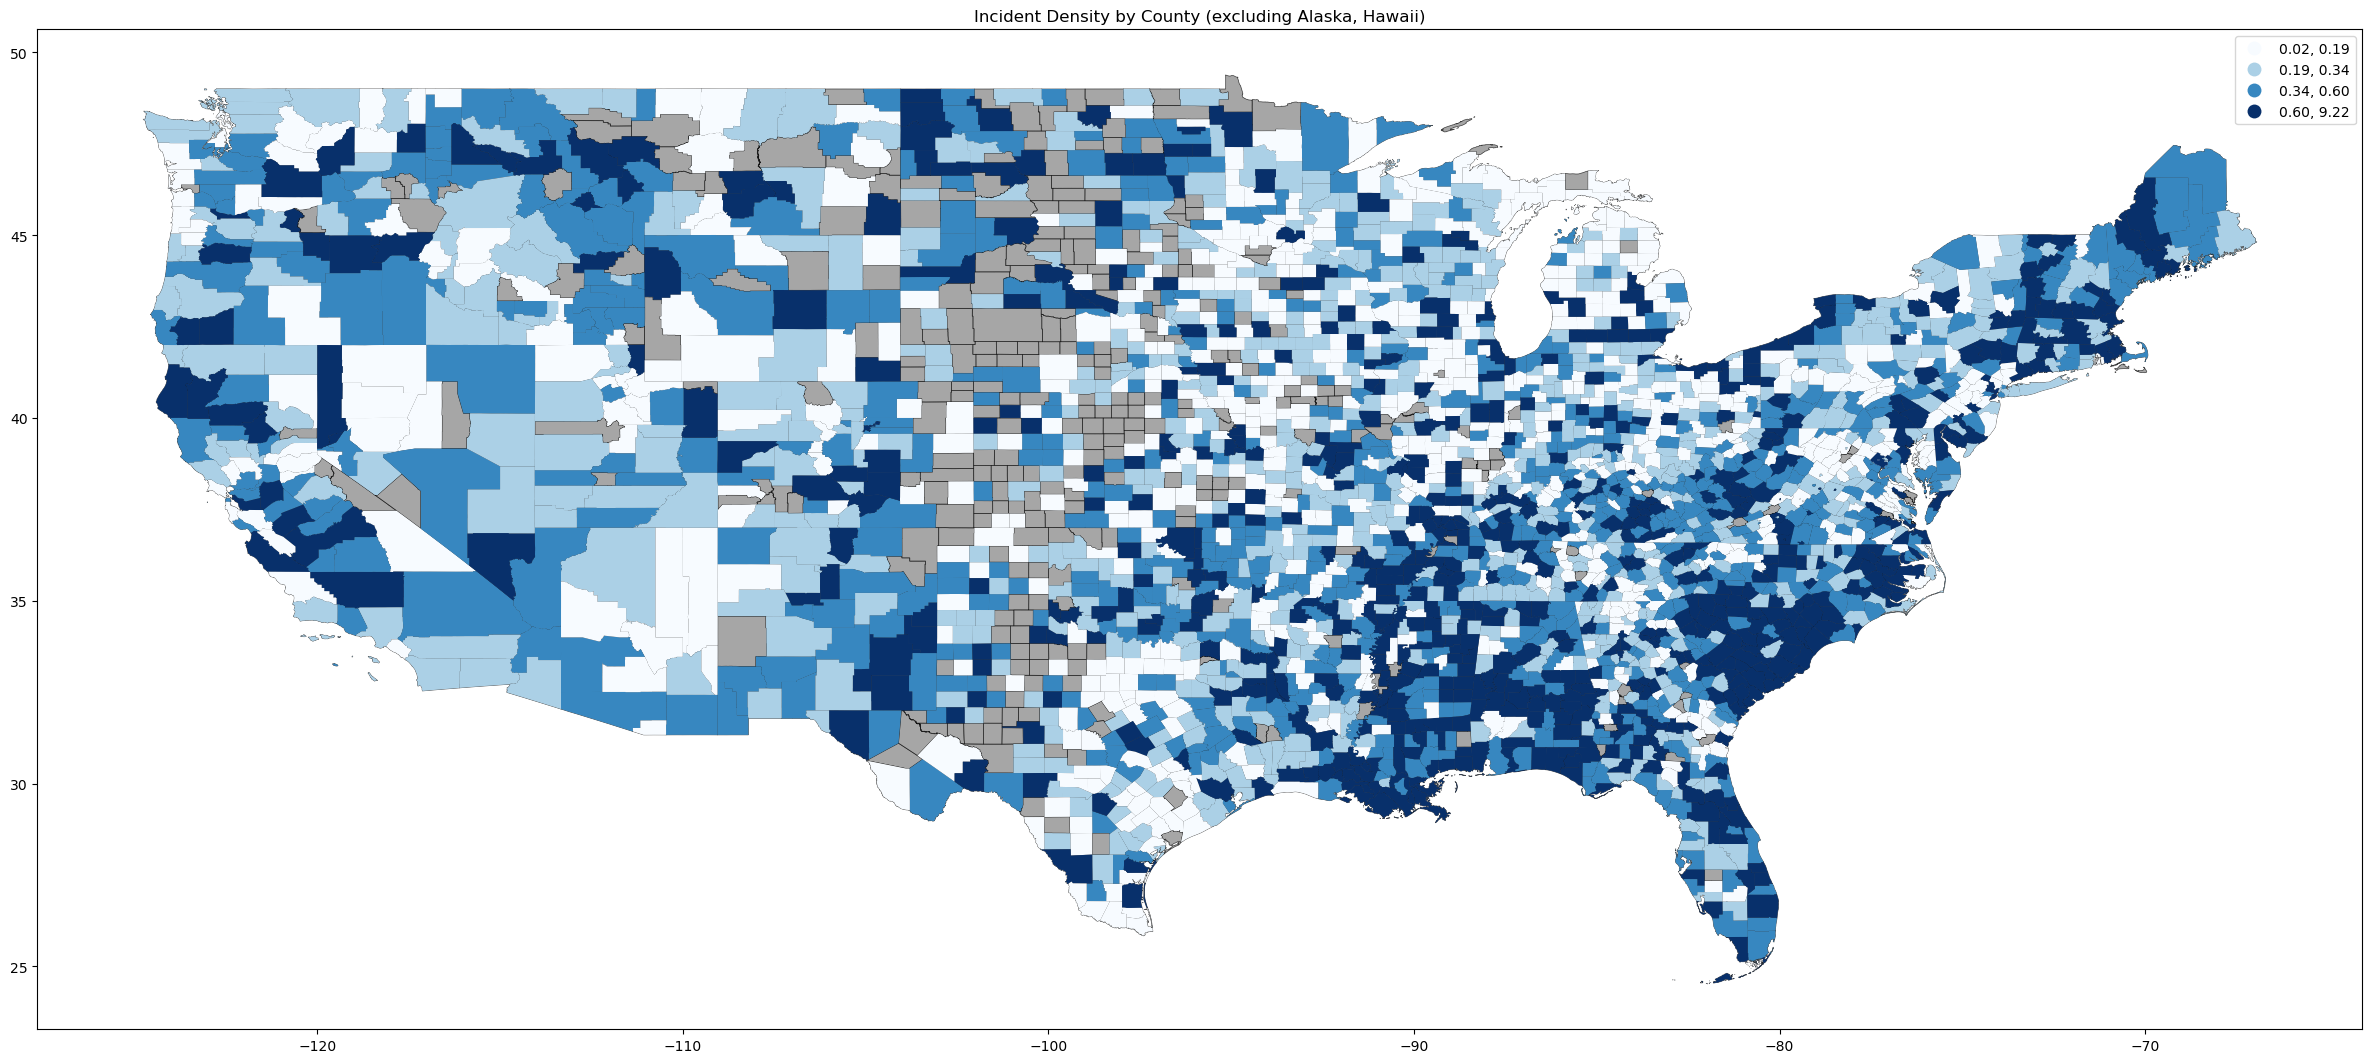

In [70]:

incident_count_by_county = merge_geo.groupby('id_county')['incident_id'].count().reset_index()

incident_pop_geo=pd.merge(incident_count_by_county,merge_geo, on='id_county', how='right')
incident_pop_geo.rename(columns={'incident_id_x':'incident_count_by_county'}, inplace=True)

agg_incident_county = incident_pop_geo.groupby('id_county').agg({'incident_count_by_county': 'first', 'resident_pop_year_2016': 'first'}).reset_index()
agg_incident_county['incident_density'] = agg_incident_county['incident_count_by_county'] / agg_incident_county['resident_pop_year_2016']


# Create a GeoDataFrame with the incident density
incident_density_geo = total_db_geo.merge(agg_incident_county, on='id_county', how='left')

# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "incident_density", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Incident Density by County (excluding Alaska, Hawaii)")
plt.show()

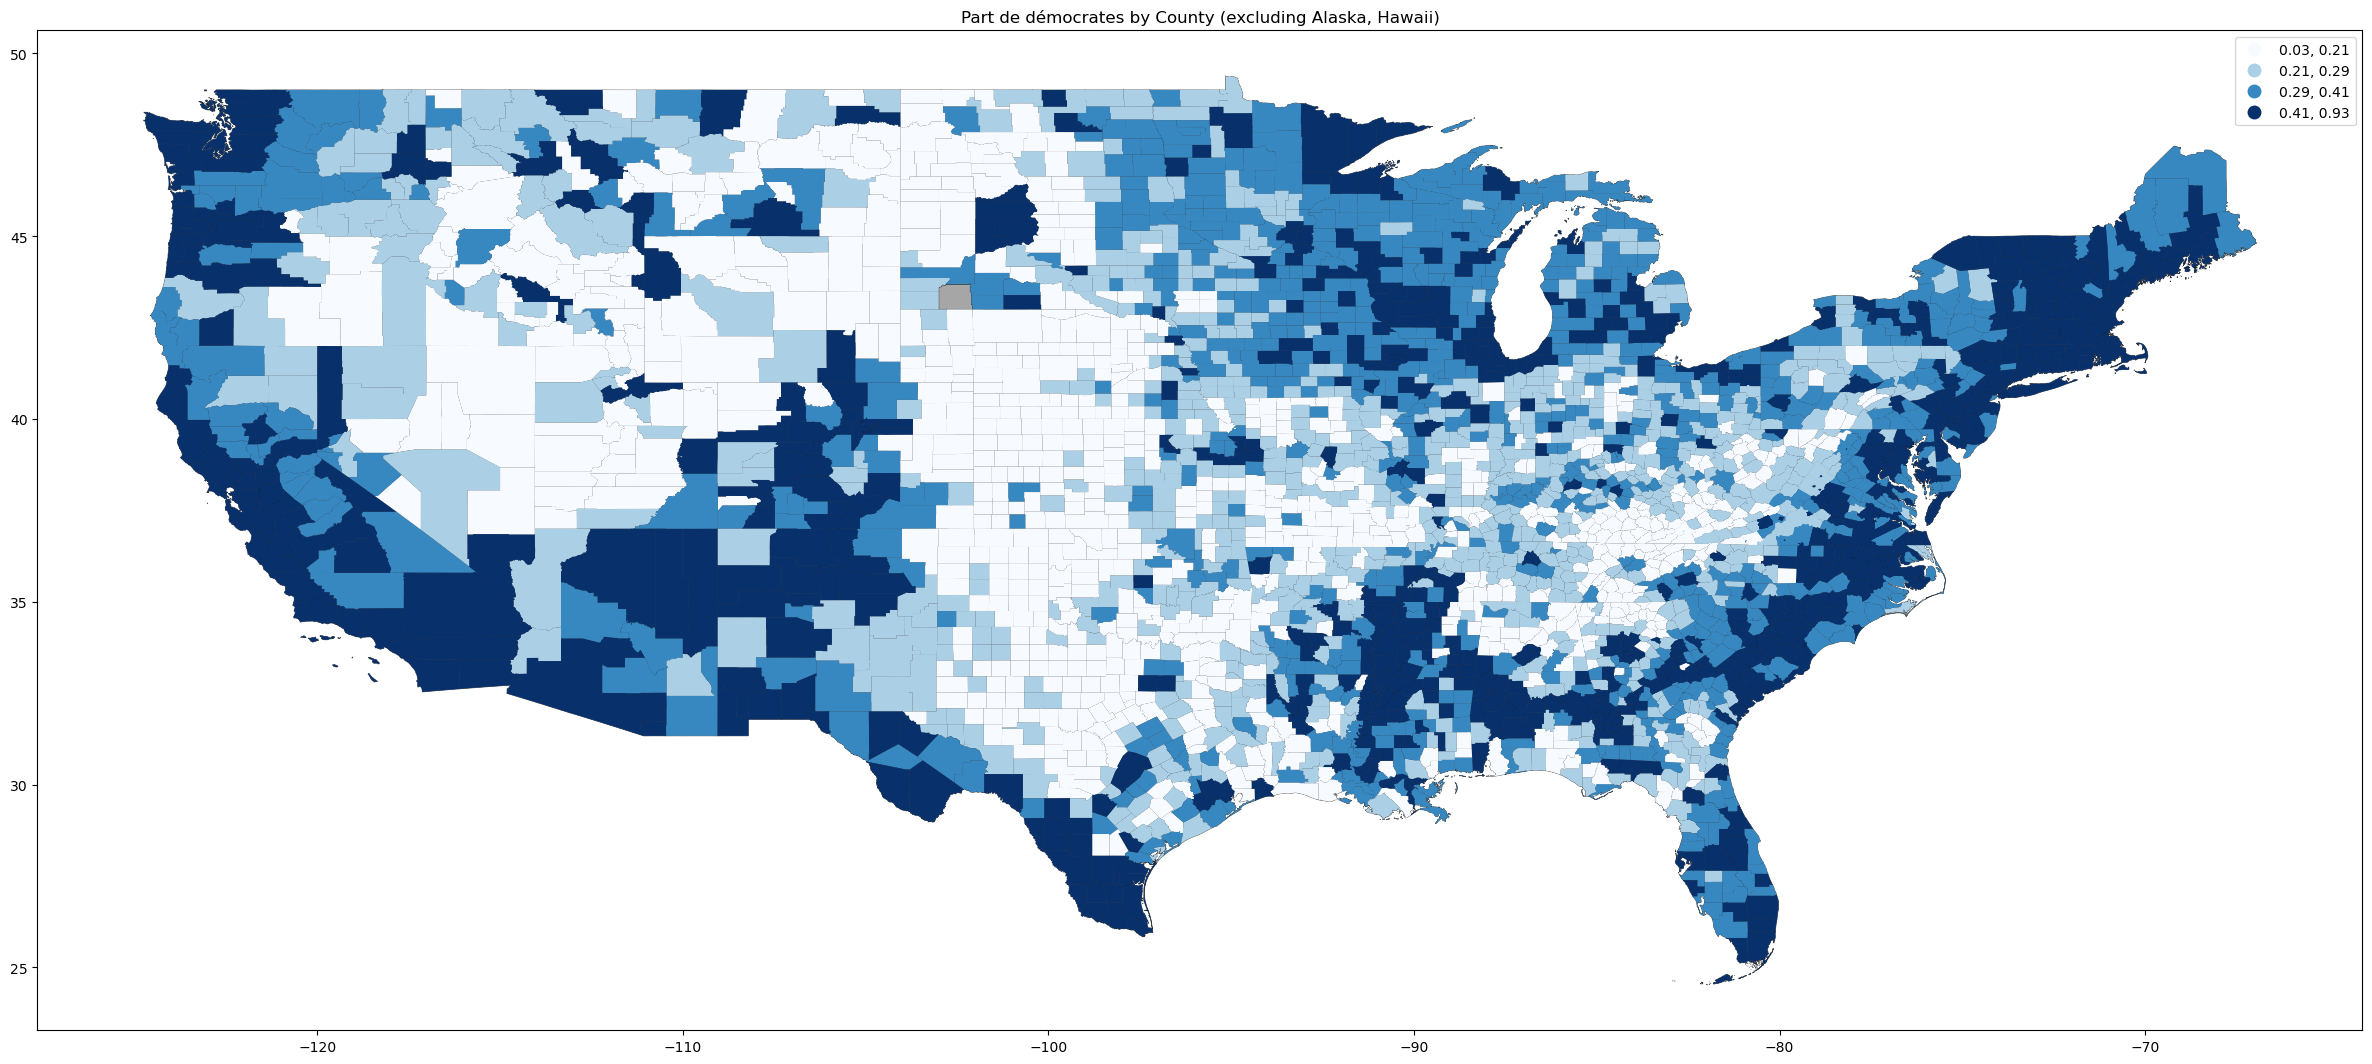

In [32]:
# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "per_dem", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Part de démocrates by County (excluding Alaska, Hawaii)")
plt.show()

In [59]:
top_threshold = incident_density_geo['incident_density'].quantile(0.99)
bottom_threshold = incident_density_geo['incident_density'].quantile(0.05)

# Select rows with top 5% values
top_5_percent = incident_density_geo[incident_density_geo['incident_density'] > top_threshold]
top_5_percent.sort_values(by='incident_density', ascending=False)

# Select rows with bottom 5% values
#bottom_5_percent = df[df['density_incident'] < bottom_threshold]

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,geometry,fips,unemp_rate_year_2013,unemp_rate_year_2014,unemp_rate_year_2015,unemp_rate_year_2016,unemp_rate_year_2017,unemp_rate_year_2018,med_h_income_year_2013,med_h_income_year_2014,med_h_income_year_2015,med_h_income_year_2016,med_h_income_year_2017,med_h_income_year_2018,resident_pop_year_2013,resident_pop_year_2014,resident_pop_year_2015,resident_pop_year_2016_x,resident_pop_year_2017,resident_pop_year_2018,snap_beneficiaries_year_2013,snap_beneficiaries_year_2014,snap_beneficiaries_year_2015,snap_beneficiaries_year_2016,snap_beneficiaries_year_2017,snap_beneficiaries_year_2018,bachelors_deg_year_2013,bachelors_deg_year_2014,bachelors_deg_year_2015,bachelors_deg_year_2016,bachelors_deg_year_2017,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop,incident_count_by_county,resident_pop_year_2016_y,incident_density
2900,2945,Richmond,Virginia,VA,27330,30306,Richmond,"POLYGON ((-77.60117 37.54516, -77.59584 37.545...",51760.0,5.0,4.9,3.6,3.2,3.2,4.2,42738.0,42204.0,43888.0,45403.0,48355.0,49399.0,8.948,8.880,8.779,8.755,8.882,8.982,1521.0,1470.0,1452.0,1422.0,1366.0,1320.0,12.3,12.9,12.7,13.4,13.4,15.7,2.00,498426,419764,462997,528369,520827,476760,0.787973,0.150479,850.0,8.755,97.087379
2899,2944,Richmond,Virginia,VA,27330,30306,Richmond,"POLYGON ((-76.93803 38.08543, -76.93619 38.084...",51159.0,5.0,4.9,3.6,3.2,3.2,4.2,42738.0,42204.0,43888.0,45403.0,48355.0,49399.0,8.948,8.880,8.779,8.755,8.882,8.982,1521.0,1470.0,1452.0,1422.0,1366.0,1320.0,12.3,12.9,12.7,13.4,13.4,15.7,2.00,498426,419764,462997,528369,520827,476760,0.368940,0.606135,850.0,8.755,97.087379
1555,1598,St. Louis,Missouri,MO,154,28941,St. Louis,"POLYGON ((-90.32052 38.59415, -90.31904 38.597...",29510.0,7.9,6.6,5.0,4.6,3.9,4.4,34346.0,35681.0,37948.0,39954.0,40876.0,43263.0,318.624,317.599,316.268,312.926,308.424,303.661,103049.0,101362.0,94918.0,82575.0,77764.0,71447.0,29.6,30.4,31.9,33.0,34.1,35.0,0.40,567009,517063,584875,632319,524973,496184,0.796582,0.159188,2884.0,312.926,9.216236
1554,1597,St. Louis,Missouri,MO,154,28941,St. Louis,"POLYGON ((-90.73643 38.46985, -90.73614 38.477...",29189.0,7.9,6.6,5.0,4.6,3.9,4.4,34346.0,35681.0,37948.0,39954.0,40876.0,43263.0,318.624,317.599,316.268,312.926,308.424,303.661,103049.0,101362.0,94918.0,82575.0,77764.0,71447.0,29.6,30.4,31.9,33.0,34.1,35.0,0.40,567009,517063,584875,632319,524973,496184,0.557835,0.395400,2884.0,312.926,9.216236
1114,1157,Orleans,Louisiana,LA,27300,28497,Orleans,"POLYGON ((-90.14007 29.94790, -90.13760 29.951...",22071.0,5.4,6.6,5.1,4.9,4.2,4.8,36240.0,35468.0,38640.0,38418.0,37407.0,38855.0,378.863,384.228,390.094,392.265,391.819,391.506,93370.0,92772.0,92307.0,92780.0,86790.0,80802.0,33.7,34.4,35.3,36.2,36.5,36.8,2.20,353025,315357,372613,391869,329201,307192,0.808078,0.146523,3012.0,392.265,7.678483
1164,1207,Baltimore,Maryland,MD,27302,28547,Baltimore,"POLYGON ((-76.71152 39.36576, -76.71131 39.371...",24510.0,8.5,7.6,6.4,5.9,5.6,6.3,41988.0,41895.0,43192.0,46604.0,46762.0,50501.0,622.591,623.833,622.831,616.542,610.853,603.241,217100.0,206792.0,199796.0,188094.0,176445.0,166710.0,26.8,27.7,28.7,29.7,30.4,31.2,4.80,231182,142207,125694,165367,158659,151470,0.854445,0.108747,4087.0,616.542,6.628908
1163,1206,Baltimore,Maryland,MD,27302,28547,Baltimore,"MULTIPOLYGON (((-76.32570 39.31397, -76.32452 ...",24005.0,8.5,7.6,6.4,5.9,5.6,6.3,41988.0,41895.0,43192.0,46604.0,46762.0,50501.0,622.591,623.833,622.831,616.542,610.853,603.241,217100.0,206792.0,199796.0,188094.0,176445.0,166710.0,26.8,27.7,28.7,29.7,30.4,31.2,4.80,231182,142207,125694,165367,158659,151470,0.565455,0.391052,4087.0,616.542,6.628908
2831,2876,Fairfax,Virginia,VA,27330,30240,Fairfax,"POLYGON ((-77.33479 38.85383, -77.33332 38.856...",51600.0,3.6,3.5,2.8,2.8,2.3,2.8,89507.0,94067.0,99671.0,94701.0,99662.0,105532.0,23.241,23.324,23.247,23.305,23.274,23.256,1114.0,1013.0,1022.0,1002.0,929.0,884.0,

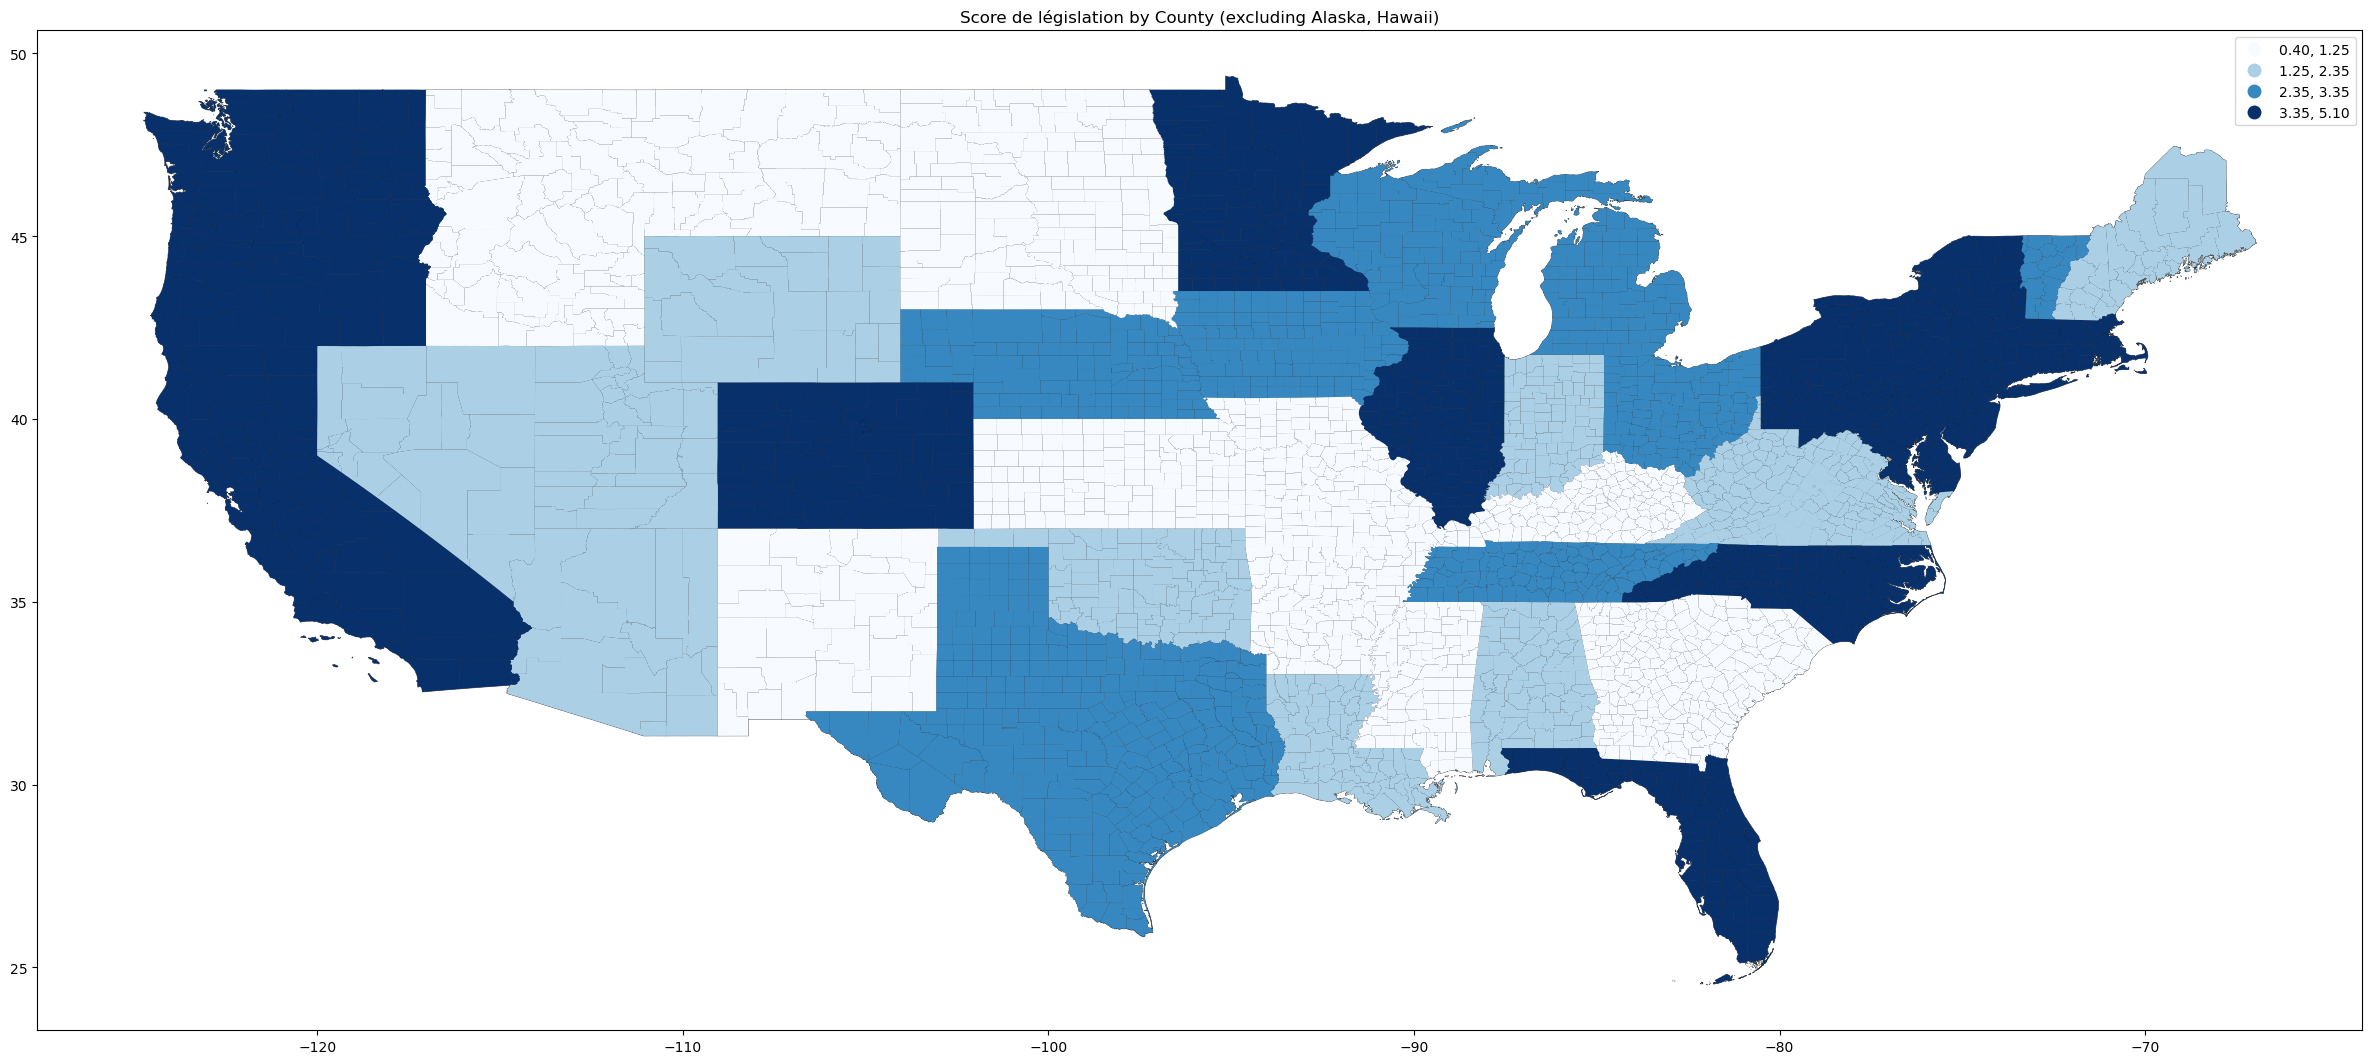

In [38]:
# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "score_legis", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Score de législation by County (excluding Alaska, Hawaii)")
plt.show()

### Tentative de visualisation de corrélations 

In [71]:
df_total_nb = merge_geo.merge(agg_incident_county, on='id_county', how='left')

In [24]:
df_total_nb

,Unnamed: 0_left,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,indic_suicide,indic_defens,indic_school,indic_home_inv,indic_accident,sus_adulte,vict_adulte,sus_male,vict_male,sus_injured,sus_arrested,sus_unharmed,sus_killed,vict_injured,vict_arrested,vict_unharmed,vict_killed,handgun,rifle,Nine_mm,shotgun,young_sus,young_vict,geometry,index_right,Unnamed: 0_right,Nom,Etat,Code_Etat,id_Etat,id_county,NAME,fips,unemp_rate_year_2013,unemp_rate_year_2014,unemp_rate_year_2015,unemp_rate_year_2016,unemp_rate_year_2017,unemp_rate_year_2018,med_h_income_year_2013,med_h_income_year_2014,med_h_income_year_2015,med_h_income_year_2016,med_h_income_year_2017,med_h_income_year_2018,resident_pop_year_2013,resident_pop_year_2014,resident_pop_year_2015_x,resident_pop_year_2016,resident_pop_year_2017,resident_pop_year_2018,snap_beneficiaries_year_2013,snap_beneficiaries_year_2014,snap_beneficiaries_year_2015,snap_beneficiaries_year_2016,snap_beneficiaries_year_2017,snap_beneficiaries_year_2018,bachelors_deg_year_2013,bachelors_deg_year_2014,bachelors_deg_year_2015,bachelors_deg_year_2016,bachelors_deg_year_2017,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop,incident_density_x,incident_count_by_county,resident_pop_year_2015_y,incident_density_y
0,100178,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,"['Shot - Wounded/Injured', 'Mass Shooting (4+ ...",40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,{0: '20'},"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}",0::Julian Sims,NaN,"{0: 'Arrested', 1: 'Injured', 2: 'Injured', 3:...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",['http://pittsburgh.cbslocal.com/2013/01/01/4-...,NaN,NaN,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,POINT (-79.85590 40.34670),2258,2258,Allegheny,Pennsylvania,PA,27320,29615,Allegheny,42003.0,5.4,4.7,4.5,4.6,4.2,4.9,51400.0,52385.0,54412.0,56099.0,58547.0,59881.0,1233.999,1233.417,1229.342,1226.893,1220.423,1217.508,160102.0,160100.0,160552.0,154950.0,152435.0,146826.0,35.9,36.9,37.8,39.1,40.0,40.7,4.00,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.400340,0.004881,1359,1229.342,1.105469
1,104811,481268,2013-10-21,Pennsylvania,Pittsburgh (Homewood),7200 block of Kelly Street,2,5,http://www.gunviolencearchive.org/incident/481268,http://www.wtae.com/news/local/allegheny/two-p...,False,14.0,NaN,NaN,"['Shot - Wounded/Injured', 'Shot - Dead (murde...",40.4555,Diverse Banquet Hall,-79.8970,NaN,NaN,"{0: '21', 1: '27'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...",0::Jasmine Morris||1::Demetrius Broadnax,NaN,"{0: 'Killed', 1: 'Killed', 2: 'Injured', 3: 'I...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",['http://pittsburgh.cbslocal.com/2013/10/20/ho...,NaN,NaN,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,POINT (-79.89700 40.45550),2258,2258,Allegheny,Pennsylvania,PA,27320,29615,Allegheny,42003.0,5.4,4.7,4.5,4.6,4.2,4.9,51400.0,52385.0,54412.0,56099.0,58547.0,59881.0,1233.999,1233.417,1229.342,1226.893,1220.423,1217.508,160102.0,160100.0,160552.0,154950.0,152435.0,146826.0,35.9,36.9,37.8,39.1,40.0,40.7,4.00,1044731,899241,993429,1143220,1062651,1021943,0.564416,0.400340,0.007321,1359,1229.342,1.105469
2,678,94128,2014-01-08,Pennsylvania,Homestead,Steak ‘n Shake at The Waterfront,1,0,http://www.gunviolencear

In [72]:
small_df=df_total_nb[["med_h_income_year_2015","young_sus", "unemp_rate_year_2015", "bchecks_2015", "incident_count_by_county", "per_dem", "score_legis"]]

In [74]:
small_df=df_total_nb.groupby('id_county').agg({
    'med_h_income_year_2015': 'first',
    'bchecks_2015':'first',
    'incident_count_by_county':'first',
    'per_dem': 'first',
    'score_legis': 'first',
    'incident_density':'first'
})

In [26]:
import seaborn as sns

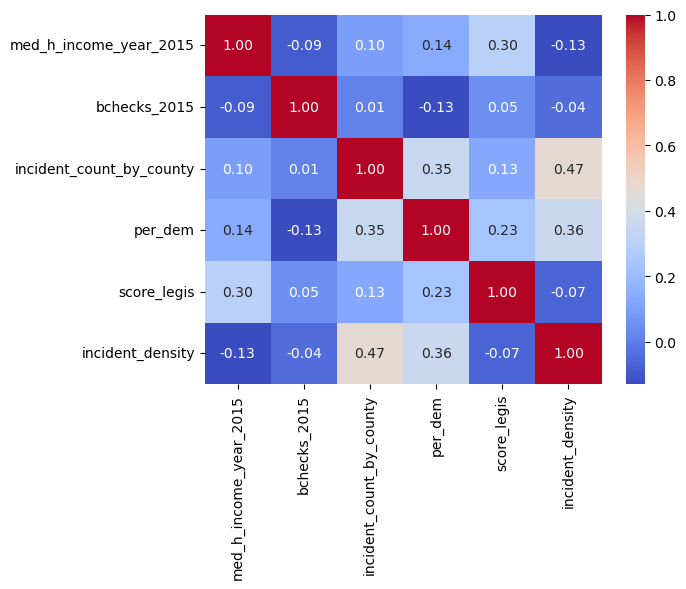

In [75]:
g1 = sns.heatmap(small_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

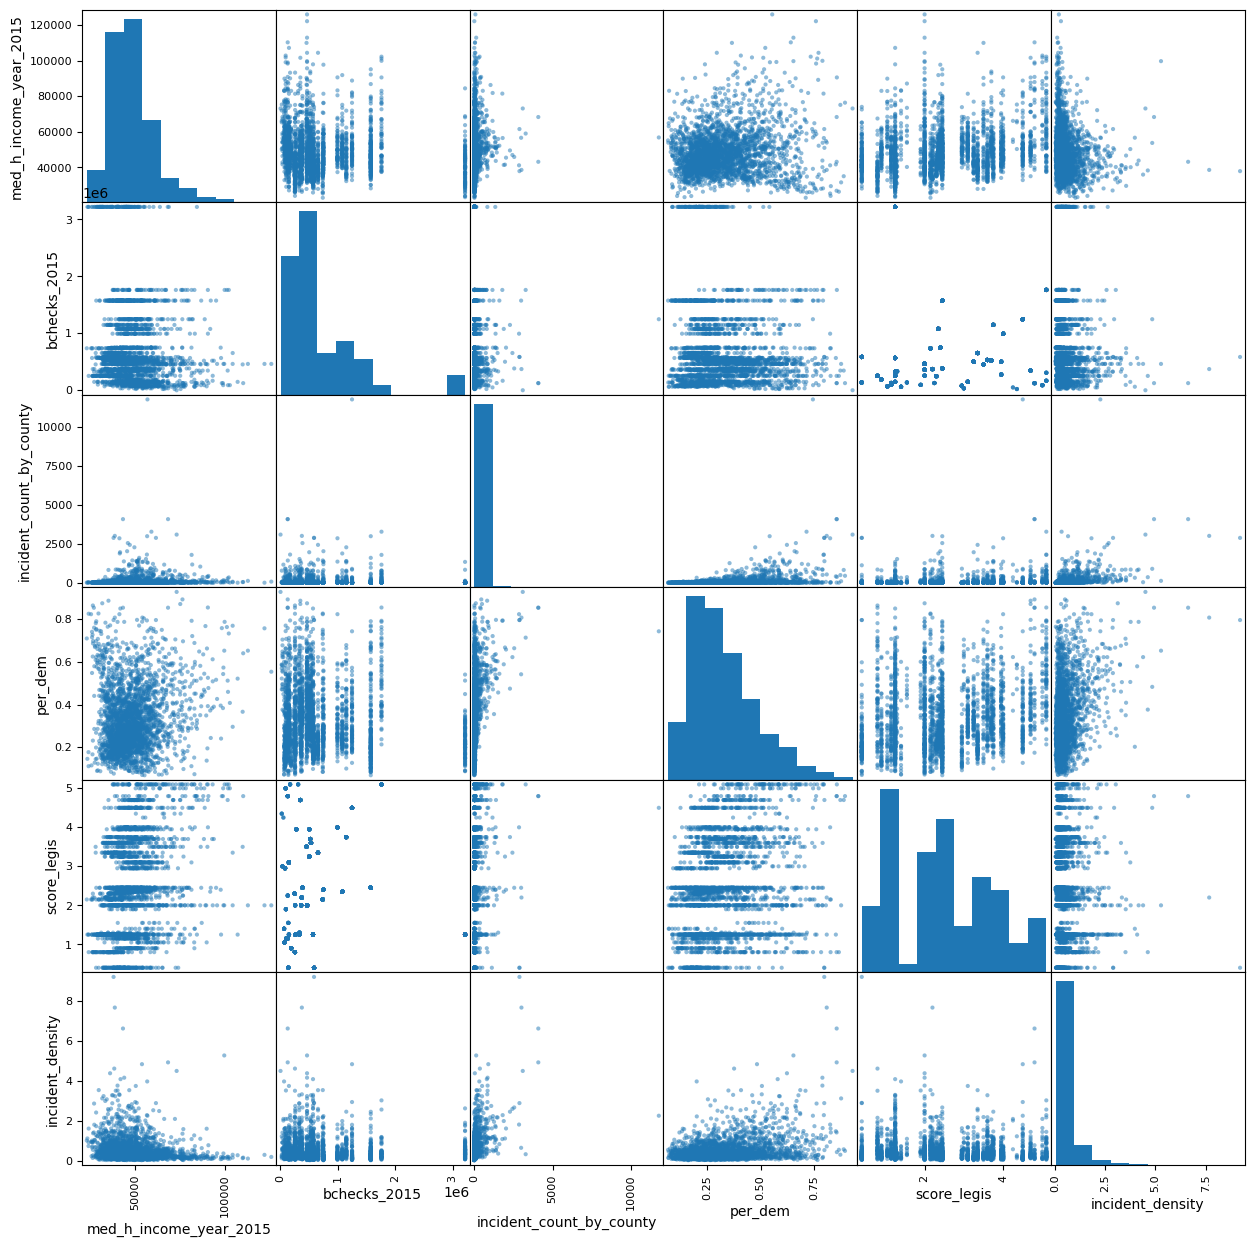

In [76]:
ax = pd.plotting.scatter_matrix(small_df, figsize = (15,15))